In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-20-most-searched-queries-in-google-search/202305.csv
/kaggle/input/top-20-most-searched-queries-in-google-search/202302.csv
/kaggle/input/top-20-most-searched-queries-in-google-search/202203.csv
/kaggle/input/top-20-most-searched-queries-in-google-search/202309.csv
/kaggle/input/top-20-most-searched-queries-in-google-search/202207.csv
/kaggle/input/top-20-most-searched-queries-in-google-search/202306.csv
/kaggle/input/top-20-most-searched-queries-in-google-search/202210.csv
/kaggle/input/top-20-most-searched-queries-in-google-search/202304.csv
/kaggle/input/top-20-most-searched-queries-in-google-search/202204.csv
/kaggle/input/top-20-most-searched-queries-in-google-search/202307.csv
/kaggle/input/top-20-most-searched-queries-in-google-search/202301.csv
/kaggle/input/top-20-most-searched-queries-in-google-search/202303.csv
/kaggle/input/top-20-most-searched-queries-in-google-search/202211.csv
/kaggle/input/top-20-most-searched-queries-in-google-search/202206.csv
/kaggl

In [2]:
import glob
from chardet import detect

# Initialize an empty list to hold DataFrames
dfs = []
file_paths = glob.glob('/kaggle/input/top-20-most-searched-queries-in-google-search/*.csv')
for file in file_paths:
# Detect the encoding of the file
    with open(file,'rb') as rawdata:
        detection_result = detect(rawdata.read(10000))
    #to determine the character encoding of the CSV files.
    encoding = detection_result['encoding']
    # Read the CSV file using the detected encoding
    df = pd.read_csv(file, encoding=encoding)

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into one
tsearches = pd.concat(dfs, ignore_index=True)
tsearches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6467 entries, 0 to 6466
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6048 non-null   float64
 1   id                             6048 non-null   float64
 2   kw_location                    6048 non-null   object 
 3   time_location                  6048 non-null   object 
 4   created_date                   6048 non-null   object 
 5   period                         6048 non-null   object 
 6   1                              6048 non-null   object 
 7   2                              6048 non-null   object 
 8   3                              6048 non-null   object 
 9   4                              6048 non-null   object 
 10  5                              6048 non-null   object 
 11  6                              6048 non-null   object 
 12  7                              6048 non-null   o

# Data Lookup

In [3]:
tsearches.head()

,Unnamed: 0,id,kw_location,time_location,created_date,period,1,2,3,4,...,Michigan-Michigan State fight,Meta stock,Heidi Klum Halloween 2022,Auburn football,Kareem Hunt,Lee Jihan,Amari Cooper,All Saints' Day,Derek Carr,Ghost
0,7165.0,7201.0,US,UK,2023-05-01 08:05:03,Morning,May Day,First Republic Bank news,Miami Heat,Shaq Barrett,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7166.0,7202.0,UK,UK,2023-05-01 08:05:03,Morning,Jock Zonfrillo,Golden State Warriors,Karl Lagerfeld,Bodmin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7168.0,7204.0,DE,UK,2023-05-01 08:05:03,Morning,Tag der Arbeit,Walpurgisnacht,HSV,Liverpool,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7169.0,7205.0,FR,UK,2023-05-01 08:05:03,Morning,Fête du travail,Warriors,Harrison Ford,Bayern,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7170.0,7206.0,NL,UK,2023-05-01 08:05:03,Morning,UWV,Jock Zonfrillo,Bayern,Alvarez,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Missing values

In [4]:
tsearches.isna().sum()

Unnamed: 0                        419
id                                419
kw_location                       419
time_location                     419
created_date                      419
period                            419
1                                 419
2                                 419
3                                 419
4                                 419
5                                 419
6                                 419
7                                 419
8                                 419
9                                 419
10                                419
11                                419
12                                419
13                                419
14                                419
15                                419
16                                419
17                                419
18                                419
19                                419
20                                419
year        

# Data Cleaning and visualize

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Keep only the first 26 columns (kw_location + top 20 searches + meta info)
tclean = tsearches.iloc[:, :26].copy()

# Fill missing locations
tclean['kw_location'] = tclean['kw_location'].fillna('Unknown')

# Convert created_date to datetime
tclean['created_date'] = pd.to_datetime(tclean['created_date'], errors='coerce')

# Preview
print(tclean.shape)
tclean.head()

(6467, 26)


,Unnamed: 0,id,kw_location,time_location,created_date,period,1,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,7165.0,7201.0,US,UK,2023-05-01 08:05:03,Morning,May Day,First Republic Bank news,Miami Heat,Shaq Barrett,...,Napoli,Kevon Looney,Karl Lagerfeld,Fulham vs Man City,Katy Perry American Idol,Bruce Springsteen,Fatal Attraction,Kevin Love,Manchester City,Devin Booker
1,7166.0,7202.0,UK,UK,2023-05-01 08:05:03,Morning,Jock Zonfrillo,Golden State Warriors,Karl Lagerfeld,Bodmin,...,Newcastle vs Southampton,Azerbaijan,PSG,Graeme Souness,Napoli,Huddersfield Town,BKFC,Cliff Thorburn,Beetlejuice,Judith Miller
2,7168.0,7204.0,DE,UK,2023-05-01 08:05:03,Morning,Tag der Arbeit,Walpurgisnacht,HSV,Liverpool,...,Darmstadt 98,Bayern gegen Hertha,Schalke,Bayern,Eintracht Frankfurt gegen Augsburg,Sarah Engels,RB Leipzig,SC Freiburg,Schalke 04,BVB
3,7169.0,7205.0,FR,UK,2023-05-01 08:05:03,Morning,Fête du travail,Warriors,Harrison Ford,Bayern,...,La Rochelle rugby,Monaco \u2013 Montpellier,Europa-Park,Grand Prix F1,Manchester City,Manifestation 1er-Mai,Charles III,Napoli,Medecin de campagne,Olivier Marchal
4,7170.0,7206.0,NL,UK,2023-05-01 08:05:03,Morning,UWV,Jock Zonfrillo,Bayern,Alvarez,...,Dag van de Arbeid,Rave,Tadic,John Heitinga,Ajax-PSV,Ajax-PSV,Napoli,KNVB-bekerfinale,NAC,Duncan Laurence


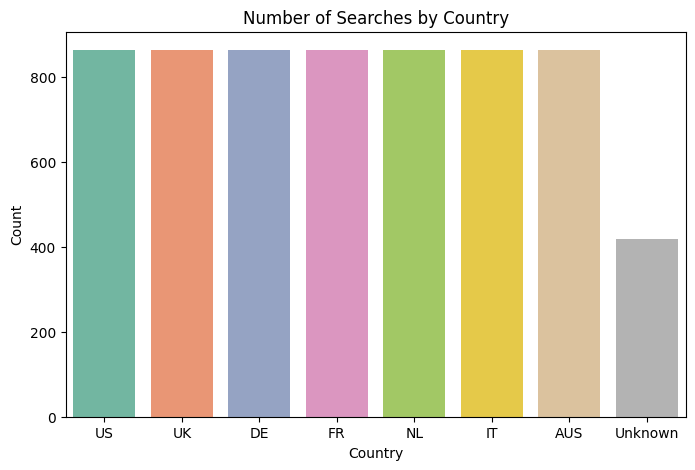

In [6]:
# Top locations
plt.figure(figsize=(8,5))
sns.countplot(data=tclean, x='kw_location', order=tclean['kw_location'].value_counts().index, palette='Set2')
plt.title("Number of Searches by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


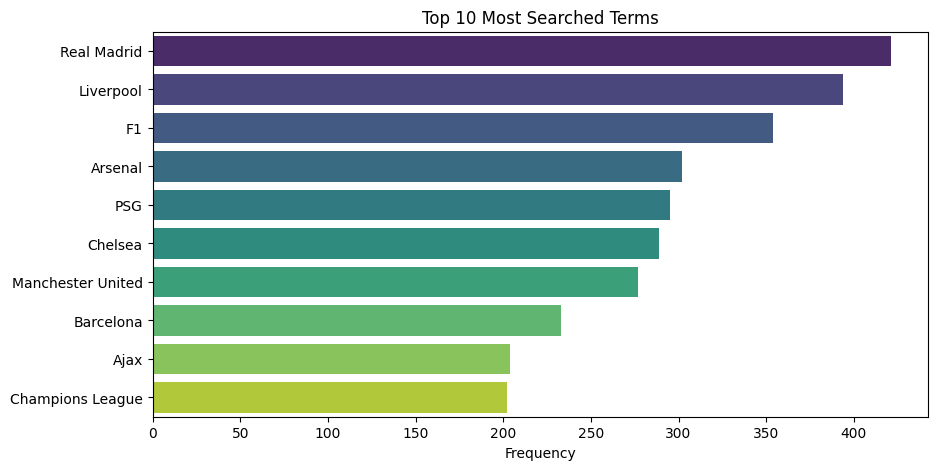

In [7]:
# Top 10 most searched terms
search_terms = tclean.iloc[:, 6:26].stack().value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=search_terms.values, y=search_terms.index, palette='viridis')
plt.title("Top 10 Most Searched Terms")
plt.xlabel("Frequency")
plt.show()

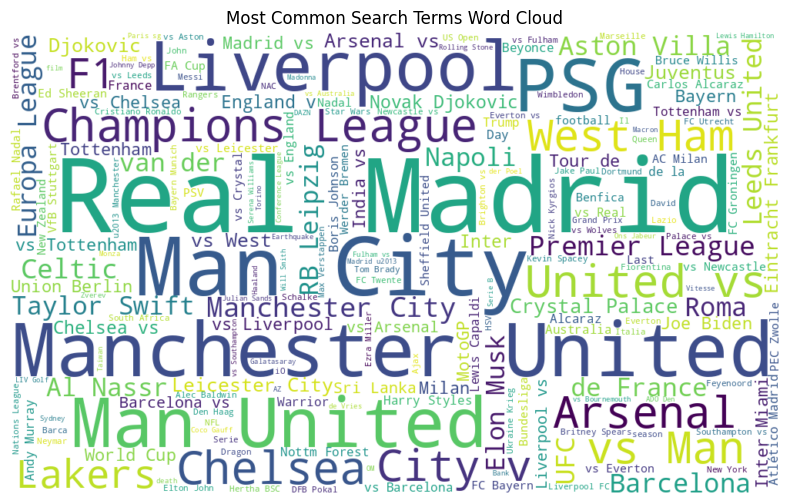

In [8]:
# Word cloud of all search terms
all_terms = " ".join(tclean.iloc[:, 6:26].fillna('').astype(str).values.flatten())
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=600, background_color='white').generate(all_terms)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Search Terms Word Cloud")
plt.show()


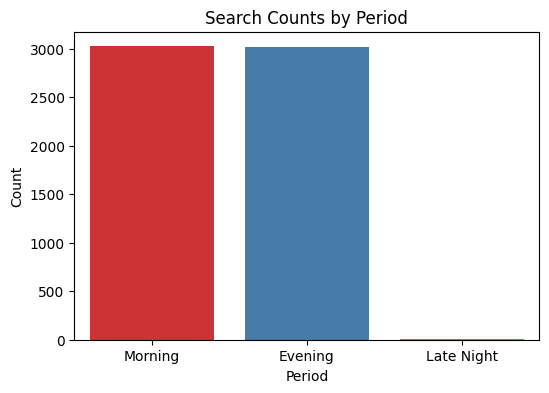

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='period', data=tclean, palette='Set1')
plt.title("Search Counts by Period")
plt.xlabel("Period")
plt.ylabel("Count")
plt.show()


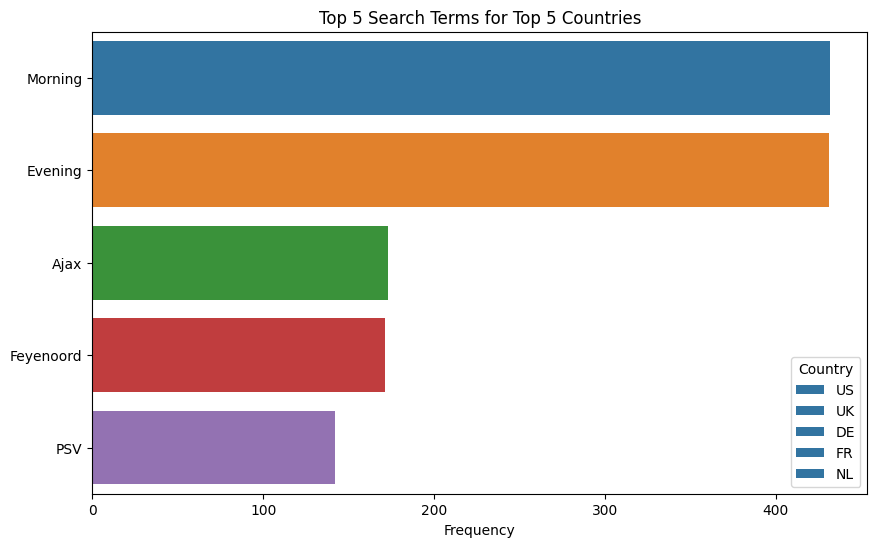

In [10]:
# Get top 5 countries by record count
top_countries = tclean['kw_location'].value_counts().head(5).index

plt.figure(figsize=(10,6))

for country in top_countries:
    terms = tclean[tclean['kw_location']==country].iloc[:, 5:25].stack().value_counts().head(5)
    sns.barplot(x=terms.values, y=terms.index, label=country)

plt.title("Top 5 Search Terms for Top 5 Countries")
plt.xlabel("Frequency")
plt.legend(title='Country')
plt.show()


# Random Forest Model: Training and Evaluation

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Use top 10 search terms + location
features = tclean[['kw_location'] + [str(i) for i in range(1, 11)]].fillna('None')
target = tclean['period']

# Encode features with fallback for unseen values
le_cols = {}
encoded_features = pd.DataFrame()
for col in features.columns:
    le = LabelEncoder()
    features[col] = features[col].astype(str)
    le.fit(features[col])
    encoded_features[col] = features[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    le_cols[col] = le

# Encode target
le_target = LabelEncoder()
y = le_target.fit_transform(target.astype(str))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(encoded_features, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions & evaluation
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Example prediction with unseen values handled
sample = pd.DataFrame({
    'kw_location': ['US'], '1': ['May Day'], '2': ['Miami Heat'],
    '3': ['Shaq Barrett'], '4': ['Liverpool'], '5': ['NFL Draft Grades'],
    '6': ['Unknown'], '7': ['Unknown'], '8': ['Unknown'], '9': ['Unknown'], '10': ['Unknown']
})

# Apply encoding (map unseen to -1)
for col in sample.columns:
    le = le_cols[col]
    sample[col] = sample[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

predicted_period = le_target.inverse_transform(rf.predict(sample))
print("Predicted period:", predicted_period[0])


Accuracy: 0.5239567233384853
              precision    recall  f1-score   support

           0       0.49      0.52      0.50       601
           2       0.49      0.47      0.48       610
           3       1.00      1.00      1.00        83

    accuracy                           0.52      1294
   macro avg       0.66      0.66      0.66      1294
weighted avg       0.52      0.52      0.52      1294

Predicted period: Evening


# CatBoost Model: Training and Evaluation

In [12]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Features: kw_location + top 20 search terms
feature_cols = ['kw_location'] + [str(i) for i in range(1,21)]
X = tclean[feature_cols].fillna('NA')  # fill NaNs in features
y = tclean['period'].fillna('Morning') # fill NaNs in target

# Split (stratify only if all classes have enough samples)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# CatBoost: all columns are categorical
cat_features = list(range(X.shape[1]))

# Create Pool
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

# Train CatBoost
model = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    loss_function='MultiClass',
    verbose=100,
    random_state=42
)
model.fit(train_pool)

# Predict & evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

# Example prediction (use only known categories from training or 'NA' for unseen)
sample_values = [
    'May Day','First Republic Bank news','Miami Heat','Shaq Barrett','Liverpool',
    'NFL Draft Grades','Tag der Arbeit','Walpurgisnacht','HSV','Liverpool',
    'PSG','Torsten Sträter','Schalke','Bayern','Eintracht Frankfurt gegen Augsburg',
    'Sarah Engels','RB Leipzig','SC Freiburg','Schalke 04','BVB'
]
sample = pd.DataFrame({
    'kw_location': ['US'],
    **{str(i): [val if val in X_train[str(i)].unique() else 'NA'] for i, val in enumerate(sample_values, start=1)}
})

predicted_period = model.predict(sample)[0]
print("Predicted period:", predicted_period)


0:	learn: 1.0427298	total: 73.1ms	remaining: 21.9s
100:	learn: 0.6246725	total: 4.92s	remaining: 9.69s
200:	learn: 0.5942222	total: 10.7s	remaining: 5.29s
299:	learn: 0.5703466	total: 16.6s	remaining: 0us
Accuracy: 0.6012364760432767
              precision    recall  f1-score   support

     Evening       0.57      0.55      0.56       601
     Morning       0.62      0.65      0.63       693

    accuracy                           0.60      1294
   macro avg       0.60      0.60      0.60      1294
weighted avg       0.60      0.60      0.60      1294

Predicted period: ['Morning']
